<center><h3>Universidade Federal de Pelotas - Cursos de Ciência e Engenharia de Computação</h3></center> 
<center><h4>Disciplina: Cálculo Numérico Computacional Profa. Larissa A. de Freitas</h4> </center> 

<center><h2><strong>Relatório 3 – Sistemas de Equações Lineares<strong></h2> </center> 

<center><h3> Aluno: Vinícius Hallmann</h3></center>

# **Imports** #

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **Funções Auxiliares** #

In [2]:
def plot_lagrange_interpolation(ax, lagrange_func, x_values: np.array, y_values: np.array, num_points: int = 100, especial_point: int = None) -> None:
    xplt = np.linspace(x_values[0], x_values[-1], num_points)
    yplt = np.zeros_like(xplt)

    for i, x in enumerate(xplt):
        yplt[i] = lagrange_func(len(x_values), x_values, y_values, x)

    ax.plot(x_values, y_values, 'o', color='#1837E7', label='Pontos', zorder=5)
    ax.plot(xplt, yplt, '-', color='#37E718', label='Interpolação de Lagrange')
    
    if especial_point is not None:
        y_especial = lagrange_func(len(x_values), x_values, y_values, especial_point)
        ax.scatter(especial_point, y_especial, color='#E71837', label=f'Ponto em x = {especial_point} é igual a {np.round( y_especial,2 )}', zorder=5)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Interpolação de Lagrange')
    ax.legend()
    ax.grid(True)

def plot_newton_interpolation(ax, newton_func, x_values: np.array, y_values: np.array, num_points: int = 100, especial_point: int = None) -> None:
    xplt = np.linspace(x_values[0], x_values[-1], num_points)
    yplt = np.zeros_like(xplt)

    for i, x in enumerate(xplt):
        yplt[i] = newton_func(len(x_values), x_values, y_values, x)

    ax.plot(x_values, y_values, 'o', color='#1837E7', label='Pontos', zorder=5)
    ax.plot(xplt, yplt, '-', color='#37E718', label='Interpolação de Newton')
    
    if especial_point is not None:
        y_especial = newton_func(len(x_values), x_values, y_values, especial_point)
        ax.scatter(especial_point, y_especial, color='#E71837', label=f'Ponto em x = {especial_point} é igual a {np.round( y_especial,2 )}', zorder=5)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Interpolação de Newton')
    ax.legend()
    ax.grid(True)

def plot_data_dispersion(x: np.array, y: np.array) -> None:
    plt.scatter(x, y, label='Dados de dispersão')
    plt.xlabel('Hora')
    plt.ylabel('Volume')
    plt.title('Dispersão de Volume ao Longo do Tempo')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_spline_interpolation(ax, spline_func, x_values, y_values, num_points=100, especial_point=None):
    xplt = np.linspace(x_values[0], x_values[-1], num_points)
    yplt = np.zeros_like(xplt)

    for i, x in enumerate(xplt):
        yplt[i] = spline_func(x_values, y_values, x)

    ax.plot(x_values, y_values, 'o', color='#1837E7', label='Pontos', zorder=5)
    ax.plot(xplt, yplt, '-', color='#37E718', label='Interpolação de Spline')
    
    if especial_point is not None:
        y_especial = spline_func(x_values, y_values, especial_point)
        ax.scatter(especial_point, y_especial, color='#E71837', label=f'Ponto em x = {especial_point} é igual a {np.round(y_especial, 2)}', zorder=5)
    
    ax.set_xlabel('Horas')
    ax.set_ylabel('Nº de bactérias por vol. unitário')
    ax.set_title('Interpolação de Spline para Dados de Bactérias por Hora')
    ax.legend()
    ax.grid(True)

def plot_fits(hour, vol, a_abx, b_abx, a_axb, b_axb):
    hours = np.linspace(0, 6, 100)
    vol_abx = a_abx * (b_abx ** hours)
    vol_axb = a_axb * (hours ** b_axb)
    
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    axs[0].plot(hour, vol, 'o', label='Dados Originais')
    axs[0].plot(hours, vol_abx, '-', label=f'Ajuste: $y = {a_abx:.2f} \\cdot ({b_abx:.2f})^x$')
    axs[0].set_xlabel('Horas')
    axs[0].set_ylabel('Nº de bactérias por vol. unitário')
    axs[0].set_title('y = ab^x')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(hour, vol, 'o', label='Dados Originais')
    axs[1].plot(hours, vol_axb, '-', label=f'Ajuste: $y = {a_axb:.2f} \\cdot x^{{{b_axb:.2f}}}$')
    axs[1].set_xlabel('Horas')
    axs[1].set_ylabel('Nº de bactérias por vol. unitário')
    axs[1].set_title('y = ax^b')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# **Métodos** #

In [3]:
def lagrange( n: int, x: np.array, y: np.array, interpolation_value: float ) -> float:
    interpolated_value: float = 0.0

    #if interpolated_value == interpolation_value: return

    for i in range( n ):
        cd: float = 1.0
        for j in range( n ):
            if i != j:
                cd *= ( interpolation_value - x[j] ) / ( x[i] - x[j] )
        interpolated_value += y[i] * cd

    return interpolated_value

In [4]:
def newton( n: int, x: np.array, y: np.array, interpolation_value: float ) -> float:
    dely = np.zeros( n )

    for i in range( n ): 
        dely[i] = y[i]

    for i in range( 1, n ):
        for j in range( n - 1, i - 1, -1 ):
            dely[j] = ( ( dely[j] - dely[j - 1] ) / ( x[j] - x[j - i] ) )

    interpolated_value = dely[n - 1]
    for i in range( n - 2, -1, -1 ): interpolated_value = dely[i] + ( interpolation_value - x[i] ) * interpolated_value

    return interpolated_value

In [5]:
def Spline( n: int, x: np.array, y: np.array, interpolation_value: float ) -> float:
    info: int
    if n < 3:
        info = -1
        return info

    ordened: bool = True
    for i in range( n - 1 ):
        ordened = ordened and x[i] <= x[i + 1]

    if not ordened:
        info = -2
        return info

    info = 0
    m = n - 1
    h1 = x[1] - x[0]
    delta1 = ( y[1] - y[0] ) / h1
    e = np.zeros( m - 1 )
    d = np.zeros( m - 1 )
    s2 = np.zeros(n)
    for i in range( m - 1 ):
        ip1 = i + 1
        ip2 = i + 2
        h2 = x[ip2] - x[ip1]
        delta2 = ( y[ip2] - y[ip1] ) / h2
        e[i] = h2
        d[i] = 2 * (h1 + h2)
        s2[ip1] = 6 * ( delta2 - delta1 )
        h1 = h2

    for i in range( 1, m - 1 ):
        t = e[i - 1] / d[i - 1]
        d[i] = d[i] - t * e[i - 1]
        s2[i + 1] = s2[i + 1] - t * s2[i]

    s2[m - 1] = s2[m - 1] / d[m - 2]
    for i in range( m - 3, -1, -1 ):
        s2[i + 1] = (s2[i + 1] - e[i] * s2[i + 2]) / d[i]

    s2[0] = 0
    s2[m] = 0

    for i in range( m ):
        if x[i] <= interpolation_value <= x[i + 1]:
            h = x[i + 1] - x[i]
            A = ( x[i + 1] - interpolation_value ) / h
            B = ( interpolation_value - x[i] ) / h
            result = A * y[i] + B * y[i + 1] + ( ( A ** 3 - A ) * s2[i] + ( B ** 3 - B ) * s2[i + 1] ) * ( h ** 2 ) / 6
            return result

    return info

In [6]:
def chapra( n: int, x: np.array, y: np.array):
    sumx: float = 0 
    sumy: float = 0 
    sumxy: float = 0
    sumx2: float = 0
    st: float = 0 
    sr: float = 0

    for i in range( n ):
        sumx += x[i]
        sumy += y[i]
        sumxy += x[i] * y[i]
        sumx2 += x[i]**2
    
    xm = sumx / n
    ym = sumy / n
    d = ( n * sumx2 - sumx**2 )

    if d != 0:
        a1 = ( n * sumxy - sumx * sumy ) / d
    else:
        a1 = 0

    a0 = ym - a1*xm
    for i in range(n):
        st += ( y[i] - ym )**2
        sr += ( y[i] - a1*x[i] - a0 )**2
    if n > 2:
        syx = ( sr / ( n - 2 ) )**0.5
    else:
        syx = float( 'inf' )
    
    if st != 0:
        r2 = ( st - sr ) / st
    else:
        r2 = 0

    return a0, a1, syx, r2

# **Questão 1** #

Um automóvel percorreu 160 km numa rodovia que liga duas cidades e gastou, neste trajeto, 2 horas e 20 minutos. A tabela abaixo dá o tempo (min) e a distância percorrida (m) em alguns pontos entre as duas cidades.

| Tempo (min)              | 0    | 10   | 30    | 60    | 90     | 120    | 140    |
|--------------------------|------|------|-------|-------|--------|--------|--------|
| Distância Percorrida (m) | 0.00 | 8.00 | 27.00 | 58.00 | 100.00 | 145.00 | 160.00 |

In [7]:
tempA     = np.array( [  0,  10,   30,   60], dtype = float )
distanceA = np.array( [0.0, 8.0, 27.0, 58.0], dtype = float )

tempB     = np.array( [  0,  10,   30,   60,    90,   120,   140], dtype = float )
distanceB = np.array( [0.0, 8.0, 27.0, 58.0, 100.0, 145.0, 160.0], dtype = float )

##### a) Qual foi aproximadamente a distância percorrida pelo automóvel no primeiros 45 minutos de viagem, considerando apenas os quatro primeiros pontos da tabela?

Considerando apenas os pontos **[0, 10, 30, 60]**:

**Usando o método de Lagrande**: O automóvel percorreu em 45 minutos uma distância de **42.56 KM**.

**Usando o método de Newton**: O mesmo resultado para a distância de **42.56 KM** foi encontrada.

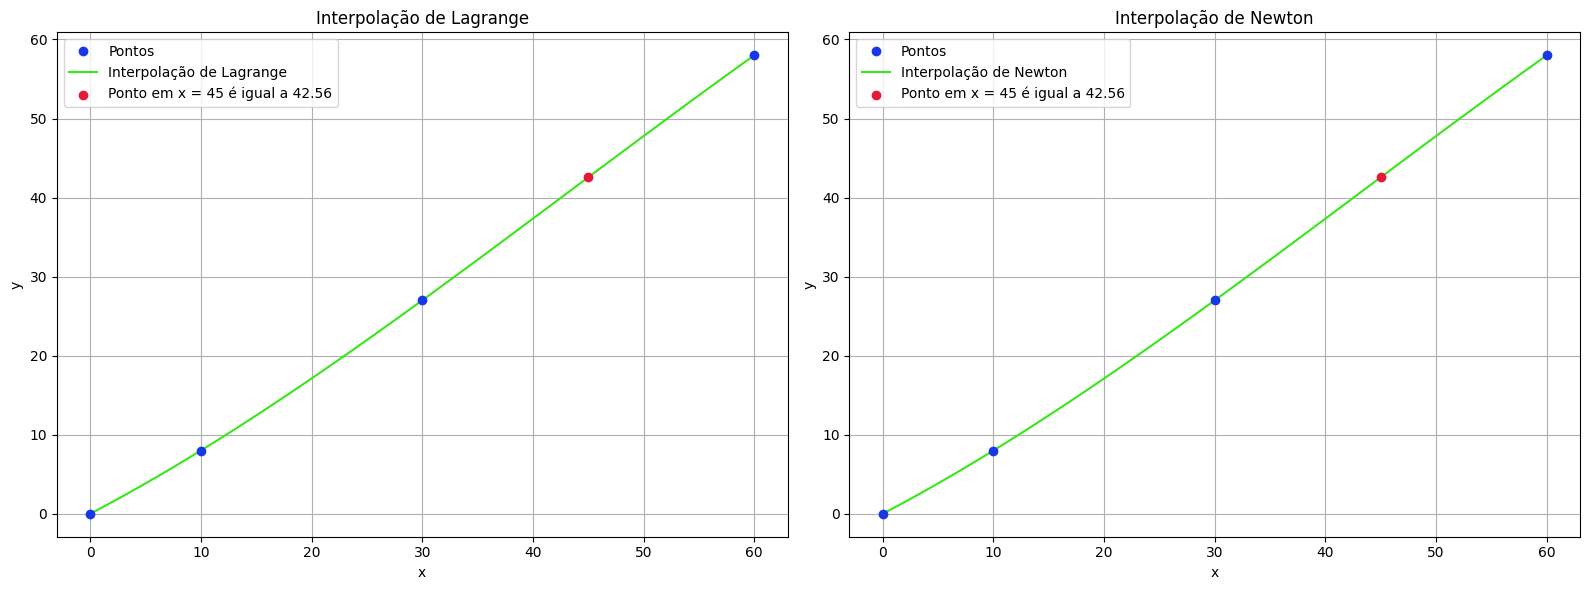

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
plot_lagrange_interpolation(axs[0], lagrange, tempA, distanceA, 100, 45)
plot_newton_interpolation(axs[1], newton, tempA, distanceA, 100, 45)
plt.tight_layout()
plt.show()

##### b) Quantos minutos o automóvel gastou para chegar à metade do caminho?

Considerando apenas os pontos **[0, 10, 30, 60, 90, 120, 140]**:

**Usando o método de Lagrande**: Para o automóvel chegar à metade do caminho (80 KM), ele levou aproximadamente **77 minutos**.

**Usando o método de Newton**: O mesmo resultado para o tempo percorrido para chegar a métado do caminho de com o método de Newton foi de **77 minutos** também.

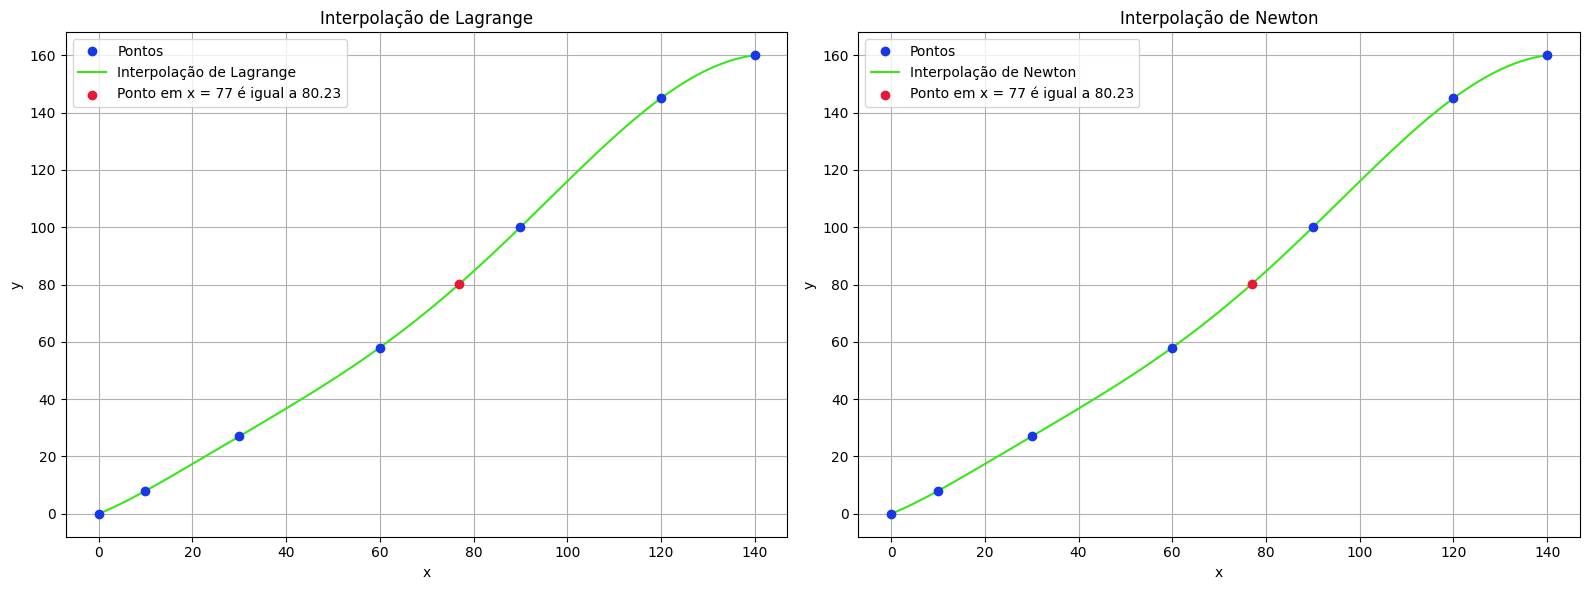

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
plot_lagrange_interpolation(axs[0], lagrange, tempB, distanceB, 100, 77)
plot_newton_interpolation(axs[1], newton, tempB, distanceB, 100, 77)
plt.tight_layout()
plt.show()

# **Questão 2** #

Conhecendo-se o diâmetro e a resistividade de um fio cilíndrico verificou-se a resistência do fio (Ohms) de acordo com o comprimento (m). Os dados obtidos estão indicados a seguir:

| Comprimento (m)           | 500  | 1000 | 1500 | 2000  | 2500  | 3000  | 3500  | 4000  |
|---------------------------|------|------|------|-------|-------|-------|-------|-------|
| Resistência do fio (Ohms) | 2.74 | 5.48 | 7.90 | 11.00 | 13.93 | 16.43 | 20.24 | 23.52 |



In [10]:
length = np.array( [ 500, 1000, 1500,  2000,  2500,  3000,  3500,  4000], dtype = float )
ohms   = np.array( [2.74, 5.48, 7.90, 11.00, 13.93, 16.43, 20.24, 23.52], dtype = float )

Use um polinômio interpolador de grau 2 e um polinômio interpolador de grau 3 para determinar quais serão as prováveis resistências deste fio  (Ohms)  para comprimentos(m) de:

##### **1730 m** ######

In [11]:
lengthG2 = np.array( [ 500, 1000, 1500], dtype = float )
ohmsG2   = np.array( [2.74, 5.48, 7.90], dtype = float )

lengthG3 = np.array( [ 500, 1000, 1500,  2000], dtype = float )
ohmsG3   = np.array( [2.74, 5.48, 7.90, 11.00], dtype = float )

Usando um interpolador de grau 2 para determinar a provavel resistencia de um fio em Ohms com 1730 metros de comprimento chegamos no resultado de **8.91 Ω** tanto para o método de Newton e Lagrange

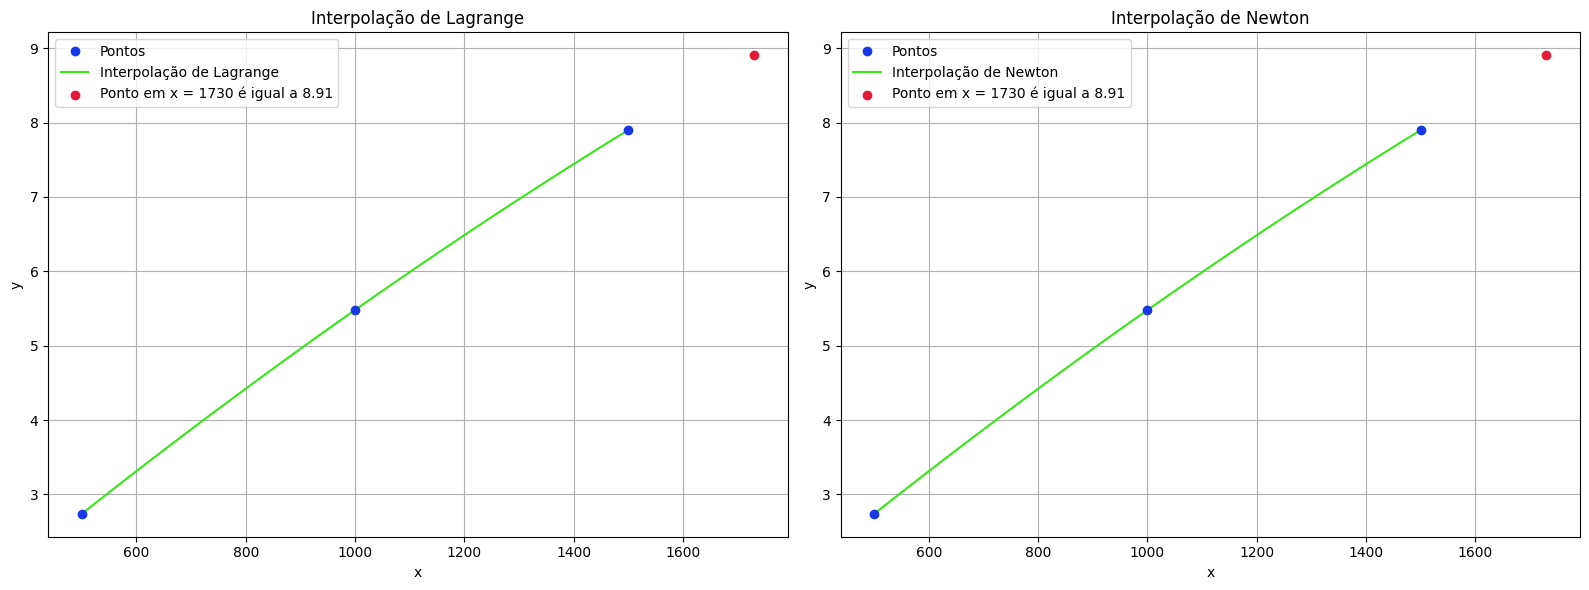

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
plot_lagrange_interpolation(axs[0], lagrange, lengthG2, ohmsG2, 100, 1730)
plot_newton_interpolation(axs[1], newton, lengthG2, ohmsG2, 100, 1730)
plt.tight_layout()
plt.show()

Já com interpolador de grau 3 o valor da resistência do fio se aproxima de **9.18 Ω** para ambos os métodos.

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
plot_lagrange_interpolation(axs[0], lagrange, lengthG3, ohmsG3, 100, 1730)
plot_newton_interpolation(axs[1], newton, lengthG3, ohmsG3, 100, 1730)
plt.tight_layout()
plt.show()

##### **3200 m** ######

In [ ]:
lengthG2 = np.array( [ 2500,  3000,  3500], dtype = float )
ohmsG2   = np.array( [13.93, 16.43, 20.24], dtype = float )

lengthG3 = np.array( [ 2000,   2500,  3000,  3500], dtype = float )
ohmsG3   = np.array( [ 11.00, 13.93, 16.43, 20.24], dtype = float )

Agora para calcular a resistencia de um fio em Ohms com 3200 usando um interpolador de grau 2 chegamos no resultado de **17.8 Ω** tanto para o método de Newton e Lagrange

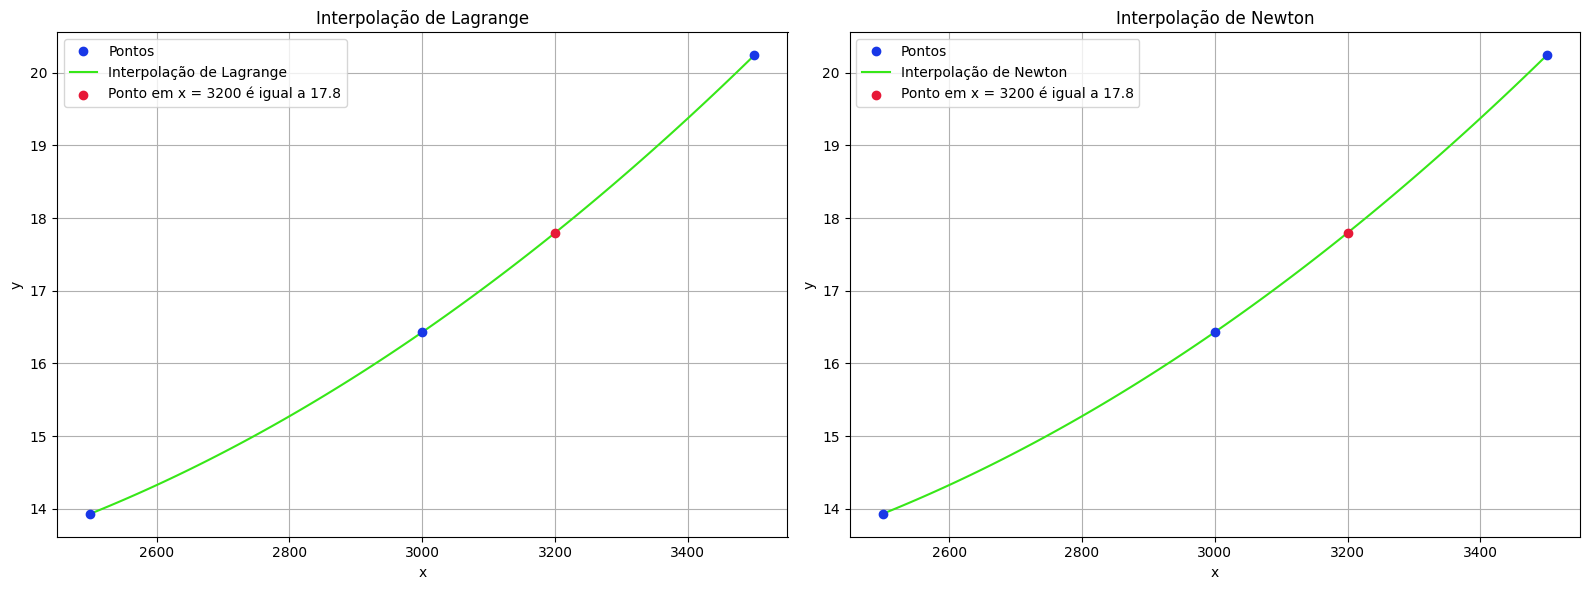

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
plot_lagrange_interpolation(axs[0], lagrange, lengthG2, ohmsG2, 100, 3200)
plot_newton_interpolation(axs[1], newton, lengthG2, ohmsG2, 100, 3200)
plt.tight_layout()
plt.show()

E o resultado usando um interpolador de grau 3 com 3200 metros de comprimento chegamos em **17.7 Ω**

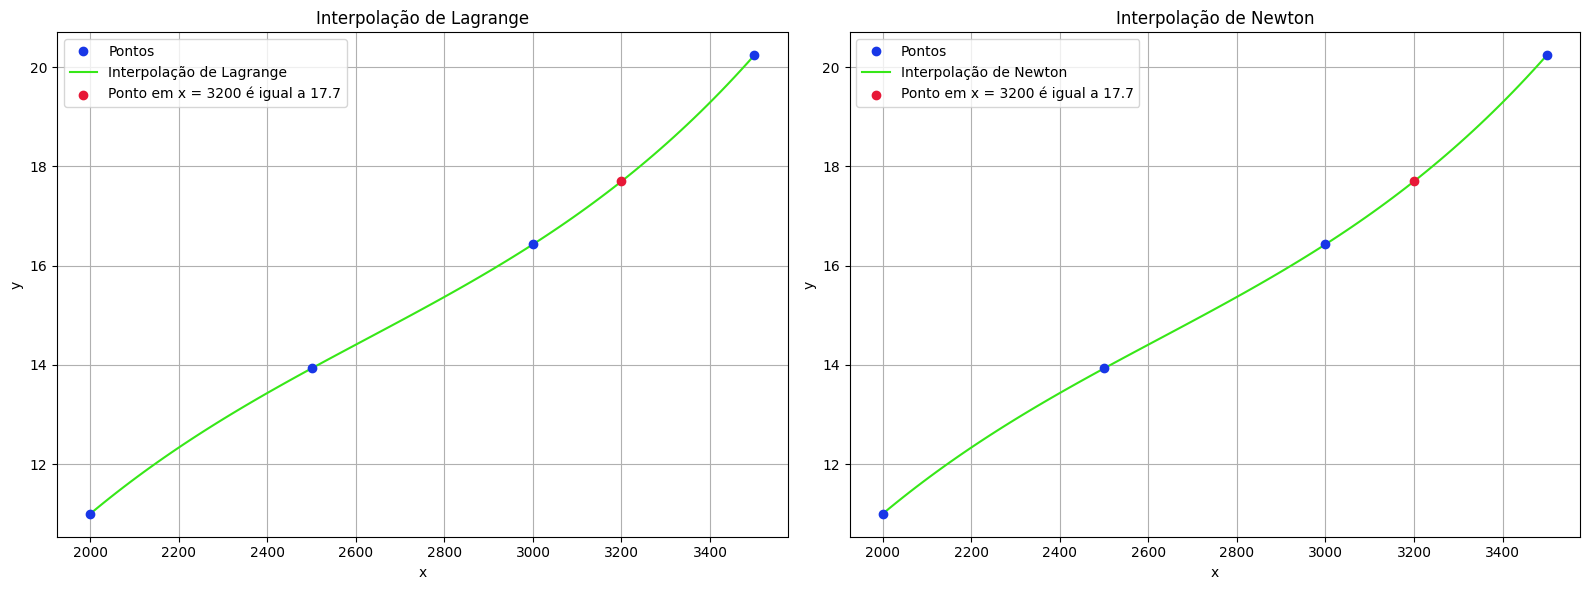

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
plot_lagrange_interpolation(axs[0], lagrange, lengthG3, ohmsG3, 100, 3200)
plot_newton_interpolation(axs[1], newton, lengthG3, ohmsG3, 100, 3200)
plt.tight_layout()
plt.show()

# **Questão 3** #

Deslocando-se um receptor de GPS num veículo ao longo do eixo de uma estrada, em Pelotas, obtiveram-se as coordenadas locais:

| Latitude (φ)   | 26′56′′,1 | 26′50′′,4 | 27′02′′,7 | 26′58′′,3 |
|----------------|-----------|-----------|-----------|-----------|
| Longitude (λ)  | 5′36′′    | 5′56′′    | 6′16′′    | 6′36′′    |

In [ ]:
latitudes  = np.array( [26.933611, 26.834444, 27.035278, 26.9675], dtype = float )
longitudes = np.array( [      5.6,  5.933333,  6.266667,   6.600], dtype = float )

#### Aproximando o eixo da estrada por um spline cúbica natural determine: 

##### a) A latitude da estrada quando a longitude é λ = 6′ ; 

In [ ]:
print(  Spline( len( latitudes ), longitudes, latitudes, 6 ) ) 

26.854406321898548


Usando o método de Spline com uma longitude λ = 6′ chegamos a uma resposta de **26.854406321898548** e que podemos converter para **26°51'15.8616"**

##### b) As coordenadas da estrada no ponto distante do equador, supondo que isso acontece entre 6′′ 16′  e 6′′ 36′  de longitude.

In [ ]:
start = 6.266667
end = 6.6
longitudes = np.linspace( start, end, 10 )
latitudes_list = []
longitudes_list = []
for longitude in longitudes:
    latitude = Spline( len( latitudes ), longitudes, latitudes, longitude ) 
    latitudes_list.append( ( latitude, longitude ) )
print( f'Latitude máxima encontrada e longitude: {np.round( max( latitudes_list ),2 )}' )

Latitude máxima encontrada e longitude: [27.04  6.34]


Gerando um espaço linear com 10 pontos entre a longitude 6′′16′  e 6′′36′ chegamos a uma latitude de **27.035278** para **27°2'7.0008"** com a longitude de **6.3407409999999995** que transformamos para **6°20'26.6676"**.

Portanto o ponto mais distante do equador é:

 - Latitude: **27°2'7"**

 - Longitude: **6°20'27"**

# **Questão 4** #

O número de bactérias, por unidade de volume, existente em uma cultura após x horas é apresentado na tabela:

| Nº de horas (x)                       | 0   | 1   | 2   | 3   | 4   | 5   | 6   |
|---------------------------------------|-----|-----|-----|-----|-----|-----|-----|
| Nº de bactérias por vol. unitário (y) | 32  | 47  | 65  | 92  | 132 | 190 | 275 |


In [ ]:
hour = np.array( [ 0, 1,   2,  3,   4,   5,   6], dtype = float )
vol  = np.array( [32, 47, 65, 92, 132, 190, 275], dtype = float )

##### a) Trace o diagrama de dispersão dos dados


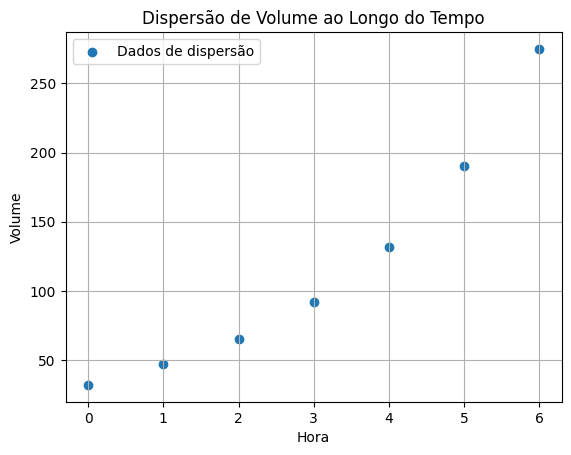

In [ ]:
plot_data_dispersion( hour, vol )

##### b) Use o método dos mínimos quadrados para ajustar os dados as curvas  y = $ab^x$ e y = $ax^b$


Curva $ y = ab^x $

In [ ]:
ln_vol = np.log(vol)
a0_abx, a1_abx, _, _ = chapra(len(hour), hour, ln_vol)
a_abx = np.exp(a0_abx)
b_abx = np.exp(a1_abx)

Curva y = $ ax^b $

In [ ]:
ln_hour = np.log(hour[1:])  
ln_vol_1 = ln_vol[1:]
a0_axb, b_axb, _, _ = chapra(len(ln_hour), ln_hour, ln_vol_1)
a_axb = np.exp(a0_axb)

Cálculo dos valores ajustados para as curvas

In [ ]:
hours = np.linspace(0, 6, 100)
vol_abx = a_abx * (b_abx ** hours)
vol_axb = a_axb * (hours ** b_axb)

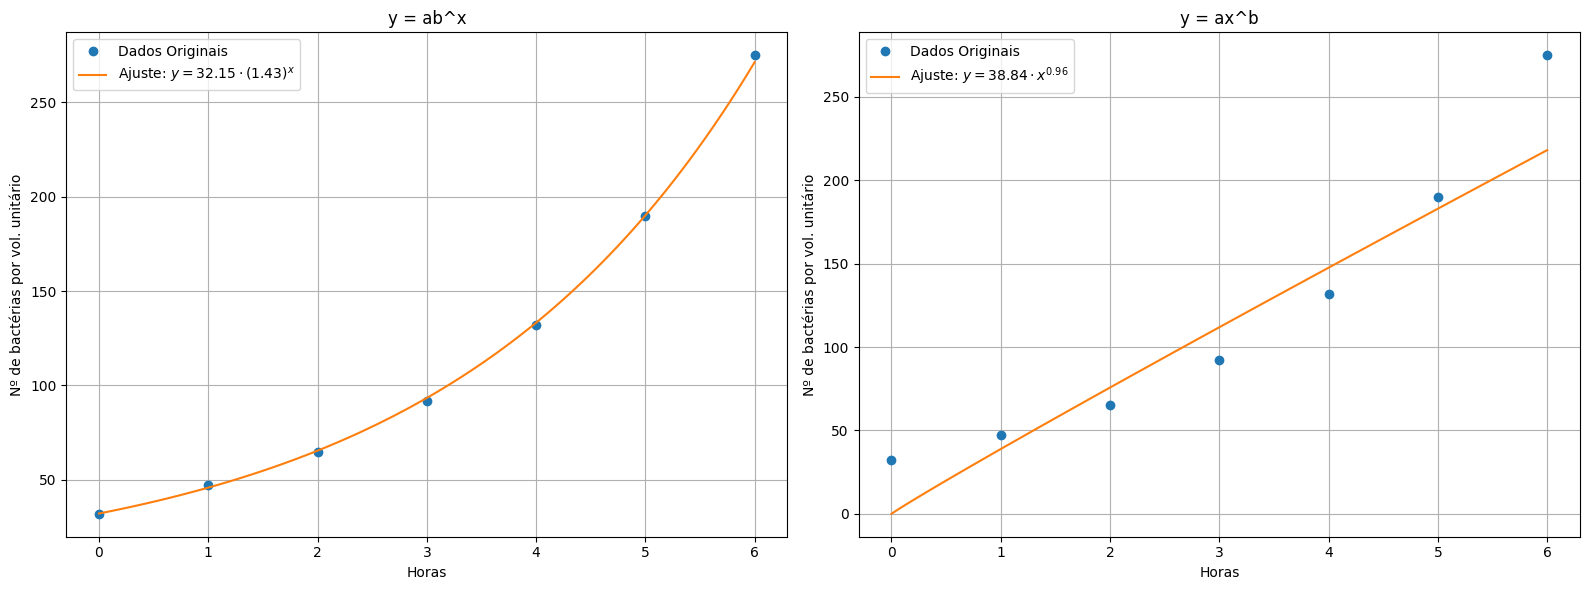

In [ ]:
plot_fits(hour, vol, a_abx, b_abx, a_axb, b_axb)

##### c) Verifique e justifique qual a equação do melhor ajuste. Utilize ela para prever o N° de bactérias por vol. unitário (y) em  N° de horas (x) igual a 7.

Após a plotagem dos dados ajustados a curva, visualmente podemos definir que a curva que melhor se ajusta a dispersão de dados foi a curva $ y = ab^x $.

##### Prever o N° de bactérias por vol. unitário em um numero de horas igual a 7



In [ ]:
vol_abx = a_abx * ( b_abx ** 7 )
print( f'Volume de bactérias após 7 horas: {np.round( vol_abx, 2 )}' )

Volume de bactérias após 7 horas: 387.27


Após 7 horas o N° de bactérias por vol. unitário é aproximadamente **387.27**